## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [190]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
import seaborn as sns


### Import Iris.csv

In [224]:
Iris1 = pd.read_csv("Iris2.csv")
Iris1
Iris1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [240]:
# Check dimension of data
Iris1.size
Iris1.shape
Iris1.ndim

X = Iris1.drop(["Species"], axis=1)
y = Iris1["Species"]

In [226]:
#Check data Type
Iris1.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [227]:
# Check for NaN/Null values
Iris1.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [228]:
#Iris
Iris1.median()
Iris1["SepalLengthCm"].fillna("5.80", inplace = True) 
Iris1["SepalWidthCm"].fillna("3.00", inplace = True) 
Iris1["PetalLengthCm"].fillna("4.35", inplace = True) 
Iris1["PetalWidthCm"].fillna("1.30", inplace = True) 
Iris1
Iris1.isnull().sum()
#Slice data set for Independent variables and dependent variables ( 1 Marks)
#Please note 'Species' is my dependent variables, name it y and independent set data as X


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [211]:
#Independent = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
#Independent Variable 
#y = Iris1['Species']

#Dependent Variable 
#x = Iris1[Independent]

#Check the dataset
#print(y)
#print(x)



0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [229]:
freq = Iris1['Species'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Species,count,prop
0,Iris-virginica,52,0.342105
1,Iris-versicolor,50,0.328947
2,Iris-setosa,50,0.328947


### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1E6F27C50>,
      dtype=object)

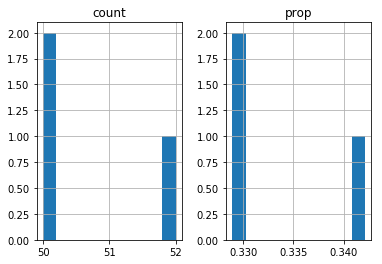

In [230]:
freq.hist()



In [ ]:
### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1E6F27AC8>]],
      dtype=object)

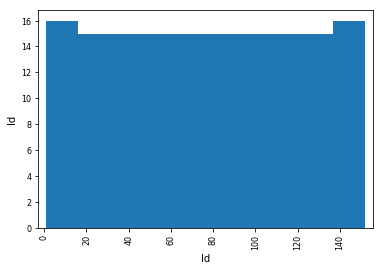

In [231]:

                          
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(Iris1))

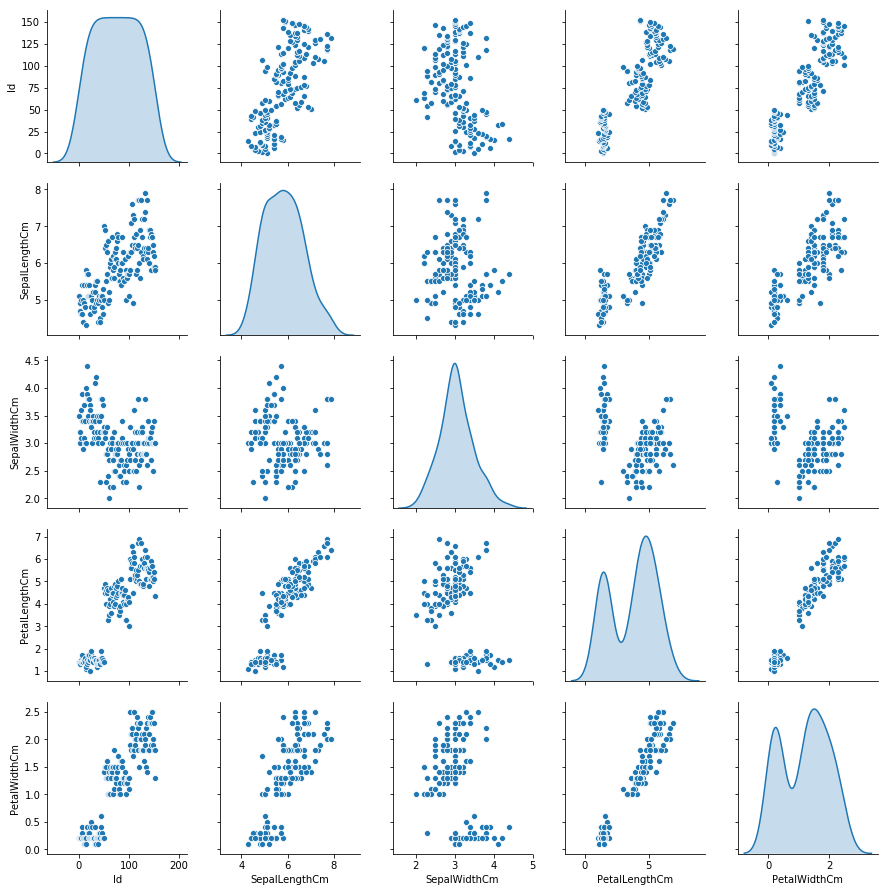

In [232]:
import seaborn as sns
sns.pairplot(Iris1, diag_kind='kde')

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [235]:
#Drop Id variable from data

Iris_dp = Iris1.drop(labels = ["Id"], axis = 1)
Iris_dp.head(5)

Iris_dp.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Correlation among all variables and give your insights (1 Marks)

In [63]:
Iris_dp.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [237]:
Iris_dp.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Split data in Training and Validation in 80:20 (1 Marks)

In [136]:
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

X1_train = np.array(Iris_dp)
X1_train.shape

y1_train = Iris_dp['Species'].astype('str')
#y1_train.shape

#from sklearn.model_selection import train_test_split
#X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2)

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



### Do Feature Scaling ( 1 Marks)

In [242]:
# Use StandardScaler or similar methods

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print('---------------')
print(y_train)

[[ 3.05662739e-01 -2.55474887e-01 -9.69030641e-02  2.22235525e-01
   1.52135098e-01]
 [ 1.16237943e-01 -3.84815730e-01 -1.53265050e+00  4.43490959e-02
  -1.16599893e-01]
 [ 1.18175242e+00  1.81397859e+00  3.81679416e-01  1.34884957e+00
   8.23972576e-01]
 [ 1.56060201e+00  1.42595607e+00  1.42388176e-01  8.15190288e-01
   1.49581005e+00]
 [ 2.81984639e-01  6.49911010e-01 -1.77194174e+00  4.00121954e-01
   1.52135098e-01]
 [-1.20973563e+00 -1.29020163e+00  8.60261896e-01 -1.08226495e+00
  -1.32590735e+00]
 [ 7.31868530e-01 -1.16086079e+00 -1.29335926e+00  4.59417430e-01
   6.89605080e-01]
 [-7.36173639e-01 -9.02179100e-01  1.81742686e+00 -1.08226495e+00
  -1.05717236e+00]
 [-7.12495539e-01 -1.29020163e+00 -9.69030641e-02 -1.37874234e+00
  -1.19153986e+00]
 [-1.23341373e+00 -9.02179100e-01  6.20970656e-01 -1.20085591e+00
  -9.22804866e-01]
 [ 5.66121833e-01 -1.26134045e-01 -5.75485544e-01  2.22235525e-01
   1.52135098e-01]
 [ 6.84512331e-01  9.08592695e-01 -9.69030641e-02  1.23025862e+00

### Train and Fit NaiveBayes Model(2 Marks)

In [243]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [244]:
#Predict
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [245]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
con

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 14]], dtype=int64)

In [246]:
# show accuracy
from sklearn.metrics import  accuracy_score

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [247]:
#Show precision and Recall metrics
from sklearn.metrics import  classification_report
print('classification_report:', classification_report(y_test, y_pred))

classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        14

      micro avg       1.00      1.00      1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31



## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [158]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [159]:
Iris4 = pd.read_csv("Iris3.csv")
Iris4
Iris4.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [161]:
Iris4.median()
Iris4["SepalLengthCm"].fillna("5.80", inplace = True) 
Iris4["SepalWidthCm"].fillna("3.00", inplace = True) 
Iris4["PetalLengthCm"].fillna("4.35", inplace = True) 
Iris4["PetalWidthCm"].fillna("1.30", inplace = True) 
Iris4
Iris4.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [165]:
cols = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
Iris4[cols] = Iris4[cols].apply(lambda x: pd.factorize(x)[0] + 1)
print(Iris4)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1              1             1              1             1   
1      2              2             2              1             1   
2      3              3             3              2             1   
3      4              4             4              3             1   
4      5              5             5              1             1   
5      6              6             6              4             2   
6      7              4             7              1             3   
7      8              5             7              3             1   
8      9              7             8              1             1   
9     10              2             4              3             4   
10    11              6             9              3             1   
11    12              8             7              5             1   
12    13              8             2              1             4   
13    14            

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

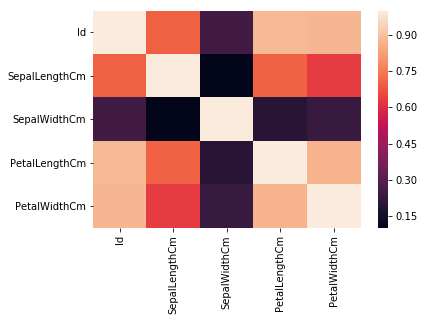

In [248]:
sns.heatmap(Iris4.corr())


In [252]:
Iris4.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.101087,0.702312,0.632118
SepalWidthCm,0.101087,1.000000,0.197313,0.236296
PetalLengthCm,0.702312,0.197313,1.000000,0.869757
PetalWidthCm,0.632118,0.236296,0.869757,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [253]:
Iris4.var()

SepalLengthCm     92.685256
SepalWidthCm      54.301847
PetalLengthCm    168.199198
PetalWidthCm      46.105220
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1E935D828>,
      dtype=object)

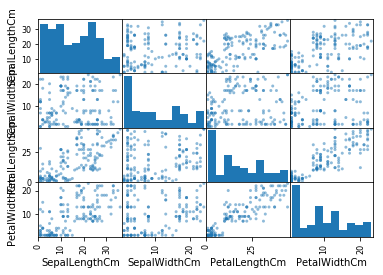

In [254]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(Iris4))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [258]:
x = Iris4.drop(["Species"], axis=1)
y = Iris4["Species"]

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [283]:
from sklearn.model_selection import train_test_split
x = Iris4.drop(["Species"], axis=1)
y = Iris4["Species"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20,train_size=0.8,random_state = 50)    

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
j = np.arange(1,19,2)
n = 0
MSE = []
k_val = []
while n<=len(j)-1:
    k = j[n]
    KNN_model = KNeighborsClassifier (n_neighbors = k,weights = 'uniform',metric ='euclidean')
    KNN_model.fit(x_train,y_train)
    y_pred_train = KNN_model.predict(x_train)
    MSE.append(1-accuracy_score(y_train,y_pred_train))
    k_val.append(k)
    dataplot = pd.DataFrame([k_val,MSE]).T
    n =n+1
    dataplot.columns = ['k','MSE']
    
    print(k,MSE)
    

1 [0.0]
3 [0.0, 0.06611570247933884]
5 [0.0, 0.06611570247933884, 0.06611570247933884]
7 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152]
9 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.06611570247933884]
11 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.06611570247933884, 0.06611570247933884]
13 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152]
15 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.07438016528925617]
17 [0.0, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.06611570247933884, 0.06611570247933884, 0.05785123966942152, 0.07438016528925617, 0.0826446280991735]


Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [295]:
pd.crosstab(Iris4['SepalLengthCm'],Iris4['SepalWidthCm'])
            

SepalWidthCm,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
SepalLengthCm,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,0,1,0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,0,1,0,0,0,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
pd.crosstab(Iris4['PetalLengthCm'],Iris4['PetalWidthCm'])

PetalWidthCm,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
PetalLengthCm,,,,,,,,,,,,,,,,,,,,,
1,8,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

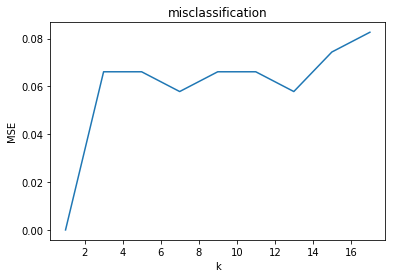

In [306]:
import matplotlib.pyplot as plt
Graph = sns.lineplot(x= 'k', y = 'MSE',data = dataplot).set_title('misclassification')